# Advection Equation

Here we solve the advection equation $u_t + a u_x=0$ using as an initial condition a gaussian profile $u(x,t=0)=\exp{[-(x-x_0)^2]}$ with $x_0=5$.

We use a domain $x\in [0,10]$ with periodic boundary conditions.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import math
import os

# Define the speed a
a = 1.0

# Define the domain
L = 10.0        # Domain length
nx = 101        # Number of grid points
dx = L/(nx-1)   # Grid spacing
x = np.linspace(0, L, nx)

# Define the time step and the final time
cf = 0.5
dt = cf*dx/a    # Time step
t_final = 20.0

print('nx=', nx)
print('dx=', dx)
print('dt=', dt)
print('Number of iterations=', t_final/dt)


# Define the initial condition
x0 = 5
u_initial = np.exp(-(x-x0)**2)

# Initialize the solution array
u_current = u_initial.copy()

# We create arrays where we will store the time and the l2norm
l2norm = []
l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))

time = []
time.append(0.0)

nx= 100001
dx= 0.0001
dt= 5e-05
Number of iterations= 400000.0


In [10]:
# Initilize time and iteration counter
t = 0.0
i = 0

# Save the initial conditions
plt.plot(x, u_current)
plt.title(f'Time={round(t,2):.2f}')
plt.ylim(0, 1.1)
plt.savefig('./images/fig_'+str(i).zfill(5)+'.png', dpi=200)
plt.close()

#solve the advection equation
while t < t_final:
    print(math.ceil(100*t/t_final), "%", end='\r')
    
    # Compute the new solution using the Lax-Friedrichs method
    # Note: np.roll(u_current, -1) is equivalent to u(j+1) and np.roll(u_current,  1) is equivalent to u(j-1)
    # Using np.roll is equivalent to use periodic boundary conditions
    u_next = 0.5*(np.roll(u_current, -1) + np.roll(u_current, 1)) - a*dt/(2*dx)*(np.roll(u_current, -1) - np.roll(u_current, 1))    
    
    # Update the solution
    u_current = u_next.copy()
    
    # Advance the time 
    t += dt
    i += 1
    
    # Compute the l2 norm and add the time to the time vector
    l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
    time.append(t)
    
    # Plot the current result and save in an image every t_final/dt/100 iterations
    if (i%(t_final/dt/100)==0):
        plt.plot(x, u_current)
        plt.title(f'Time={round(t,2):.2f}')
        plt.ylim(0,1.1)
        plt.savefig('./images/fig_'+str(i).zfill(5)+'.png', dpi=200)
        plt.close()

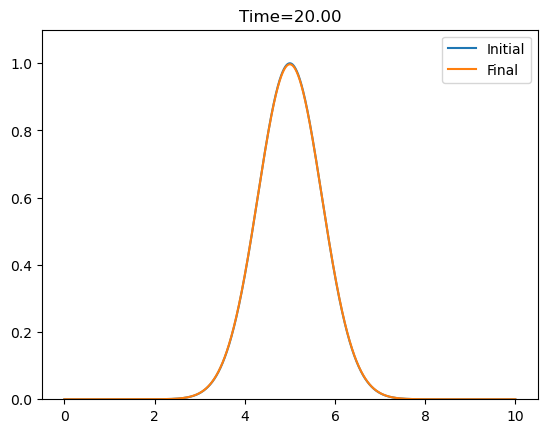

In [11]:
# Plot the final solution
plt.plot(x, u_initial, label='Initial')
plt.plot(x, u_current, label='Final')
plt.title(f'Time={round(t,2):.2f}')
plt.ylim(0, 1.1)
plt.legend()
plt.show()

In [12]:
# Set the directory where your images are stored
directory = "./images/"

# Get the list of image files in the directory
files = os.listdir(directory)

print(files, '\n')

# Sort the files in alphanumeric order
files = sorted(files)

print(files)

['fig_00000.png', 'fig_04000.png', 'fig_08000.png', 'fig_100000.png', 'fig_104000.png', 'fig_108000.png', 'fig_112000.png', 'fig_116000.png', 'fig_12000.png', 'fig_120000.png', 'fig_124000.png', 'fig_128000.png', 'fig_132000.png', 'fig_136000.png', 'fig_140000.png', 'fig_144000.png', 'fig_148000.png', 'fig_152000.png', 'fig_156000.png', 'fig_16000.png', 'fig_160000.png', 'fig_164000.png', 'fig_168000.png', 'fig_172000.png', 'fig_176000.png', 'fig_180000.png', 'fig_184000.png', 'fig_188000.png', 'fig_192000.png', 'fig_196000.png', 'fig_20000.png', 'fig_200000.png', 'fig_204000.png', 'fig_208000.png', 'fig_212000.png', 'fig_216000.png', 'fig_220000.png', 'fig_224000.png', 'fig_228000.png', 'fig_232000.png', 'fig_236000.png', 'fig_24000.png', 'fig_240000.png', 'fig_244000.png', 'fig_248000.png', 'fig_252000.png', 'fig_256000.png', 'fig_260000.png', 'fig_264000.png', 'fig_268000.png', 'fig_272000.png', 'fig_276000.png', 'fig_28000.png', 'fig_280000.png', 'fig_284000.png', 'fig_288000.png',

In [13]:
import imageio
with imageio.get_writer('./images/movie.mp4', mode='I', quality=10) as writer:
    for file in files:
        image = imageio.imread('./images/'+file)
        writer.append_data(image)
        
files=[]

C:\Users\Marco\AppData\Local\Temp\ipykernel_17680\1312841297.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread('./images/'+file)


In [14]:
# Don't worry about the code in this cell, it is just to let you display the movies you generated above in Jupyter notebook
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="./images/movie.mp4" type="video/mp4">
</video></div>""")

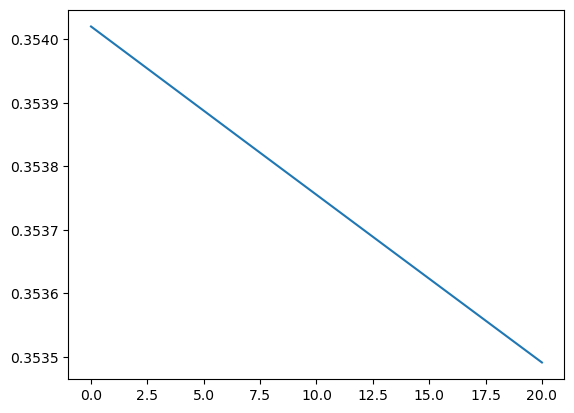

In [15]:
plt.plot(time,l2norm)
plt.show()

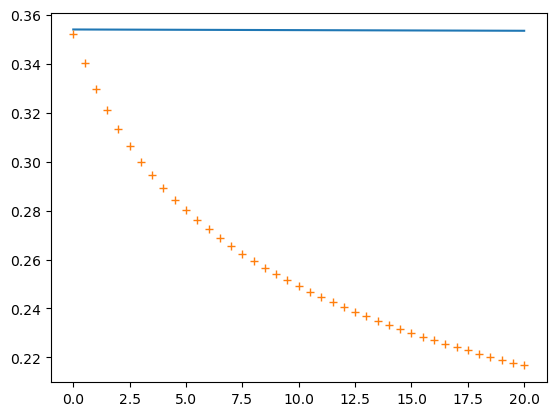

In [16]:
# Compare with data stored
l2_saved=np.genfromtxt('./l2norm_LAX.dat', comments='#')
plt.plot(time,l2norm)
plt.plot(l2_saved[:,0], l2_saved[:,1], '+')
plt.savefig('./images/l2norm.png', dpi=200)
plt.show()